<a href="https://colab.research.google.com/github/JF11579/New-Stuff/blob/main/CGR_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Options

In [1]:
options(scipen=999)

options(repr.plot.width=14, repr.plot.height=15)

options(warn=-1)

# Packages

In [2]:
library(tidyverse)
library(ggplot2)
library(lubridate)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("Jmisc")
library(Jmisc)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Jmisc’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:ggplot2’:

    %+%




# Data


In [6]:
# add csv file 
CGR_gender_compiled <- read.csv("/content/CGR_2_Gender - CGR_2Gender_Compiled.csv")

In [7]:
gender_pct <- read.csv("/content/CGR_2_Gender - Compiled_3.csv")

In [8]:
CGR_race <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly.csv")
#head(CGR_race,3)
#tail(CGR_race,3)

In [26]:
Race_values <- read.csv("/content/CGR_race_ethnicity_worksheet - ValuesOnly.csv")
head(Race_values,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


# Pre-Processing

In [27]:
CGR_gender_compiled$Year <- as.factor(CGR_gender_compiled$Year)

# make year a 
Race_values$year <- as.factor(Race_values$year)

# First Question

### *Display the data for the Total Arrests*

In [10]:
# Total arrests for both 2016 & 2019
Sum <- colSums(CGR_gender_compiled[ , 4, drop= FALSE])
Sum

Total.Arrests 
       230970

# Second Question

### *Display the data for Total Arrests by Gender*

In [11]:
# Total arrests for Males
colSums(CGR_gender_compiled[ , 5, drop= FALSE])

Male 
164391

In [12]:
# Total arrests for Females
colSums(CGR_gender_compiled[ , 6, drop= FALSE])

Female 
 66549

# Third Question

### *Display the data for Total Arrest by Race/Ethnicity*

In [13]:
#df <- data.frame(colname = names(demo),colSums_demo=colSums(demo))
df <- data.frame(colSums(CGR_race[ , c(5,7,9,11,13)]))
df

,colSums.CGR_race...c.5..7..9..11..13...
,<dbl>
White,130744
Black,78014
Hispanic,18007
Asian,1734
Other.Unknown,2232


# Fourth Question

## *Calculate change over time for each of the above*

## **Calculate change over time for Total Arrests**

124185 (2016) - 106785 (2019) = 17400

17400 / 124185 = 0.140113540282643

The rate of decline/decay is appx 14% over the 4 year period.

124185 * 0.86 = 106799





## **Calculate the change over time for Total Arrests by Gender**



**Male**

Male: 75768 (2019) - Male: 88623 (2016) = -12855

-12855/88623 = -0.145052638705528

**There was an appx drop of 15% in Total Arrest for males between 2016 and 2019.**

In [21]:
75768-88623
-12855/88623 


[1] -12855

[1] -0.1450526

**Female**

In [14]:
Total_Arrests_16 <- CGR_gender_compiled %>%
                filter(Year == "2016") 
head(Total_Arrests_16 ,3)

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2016,Cayuga,Total Arrests,1374,969,405,0
2,2016,Cayuga,Felony Total,431,326,105,0
3,2016,Cayuga,Drug,51,36,15,0


In [15]:
Total_Arrests_19 <- CGR_gender_compiled %>%
                filter(Year == "2019")
head(Total_Arrests_19,3) 

,Year,County,Crime,Total.Arrests,Male,Female,Not.Reported
,<fct>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,2019,Cayuga,Total Arrests,1241,905,336,0
2,2019,Cayuga,Felony Total,411,309,102,0
3,2019,Cayuga,Drug,66,43,23,0


In [16]:
# Total arrests for Males
colSums(Total_Arrests_16[ , 6, drop= FALSE])


Female 
 35550

In [17]:
# Total arrests for Males
colSums(Total_Arrests_19[ , 6, drop= FALSE])

Female 
 30999

Female: 30999 (2019) - Female: 35550 (2016) = -4551

-4551 / 35550 = -0.128016877637131

**There was a 12.8% drop in Total Arrests of women**

In [19]:
30999 - 35550
-4551 / 35550 


[1] -4551

[1] -0.1280169

## **Calculate the change over time by Race/Ethnicity**

In [24]:
head(CGR_race,3)

,county,year,crime,Total.Arrests,White,WhitePct,Black,BlackPct,Hispanic,HispanicPct,Asian,AsianPct,Other.Unknown,OtherPct
,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Cayuga,2016,Total Arrests,1374,1071,0.7794760,240,0.1746725,42,0.03056769,2,0.001455604,19,0.013828239
2,Cayuga,2016,Felony Total,431,325,0.7540603,92,0.2134571,12,0.02784223,0,0.000000000,2,0.004640371
3,Cayuga,2016,Drug,51,33,0.6470588,16,0.3137255,1,0.01960784,0,0.000000000,1,0.019607843


In [28]:
Race_values_long <- pivot_longer(Race_values , cols = 4:14, names_to = "Race", values_to = "Number")

In [29]:
head(Race_values_long)

county,year,crime,Race,Number
<chr>,<fct>,<chr>,<chr>,<dbl>
Cayuga,2016,Total Arrests,Total.Arrests,1374.0000000
Cayuga,2016,Total Arrests,White,1071.0000000
Cayuga,2016,Total Arrests,WhitePct,0.7794760
Cayuga,2016,Total Arrests,Black,240.0000000
Cayuga,2016,Total Arrests,BlackPct,0.1746725
Cayuga,2016,Total Arrests,Hispanic,42.0000000


In [30]:
# filter out Total Crime
Total_Crime_Race <- Race_values_long %>%
                  filter(crime == "Total Arrests")

In [32]:
#extract out the counts (as opposed to the pcts)
target <- c("Asian", "Black","Hispanic","White","Other.Unknown")

In [33]:
Total_Crime_Race <- filter(Total_Crime_Race, Race %in% target)

In [34]:
# divide data by year
Total_Crime_Race_16 <- Total_Crime_Race %>%
                filter(year == "2016")

In [36]:
# divide data by year
Total_Crime_Race_19 <- Total_Crime_Race %>%
                filter(year == "2019")

**Make a seperate df for 2016 & 2019**

In [37]:
#https://stackoverflow.com/questions/1660124/how-to-sum-a-variable-by-group
Race_totals_2016 <- Total_Crime_Race_16 %>%
    group_by(Race) %>%
    summarise(sum = sum(Number))
Race_totals_2016 

Race,sum
<chr>,<dbl>
Asian,300
Black,13555
Hispanic,3071
Other.Unknown,382
White,24087


In [38]:
Race_totals_2019 <- Total_Crime_Race_19 %>%
    group_by(Race) %>%
    summarise(sum = sum(Number))
Race_totals_2019 

Race,sum
<chr>,<dbl>
Asian,278
Black,12456
Hispanic,2937
Other.Unknown,363
White,19561


In [39]:
# revise 2019 column name
Race_totals_2019 <-rename(Race_totals_2019 , sum_2019 = sum)
Race_totals_2019 

Race,sum_2019
<chr>,<dbl>
Asian,278
Black,12456
Hispanic,2937
Other.Unknown,363
White,19561


**Now combine those df using col bind and subtract 2016 from 2019 and divide 2019 by 2016.**

In [40]:
new_data <- cbind(Race_totals_2016 , Race_totals_2019 )
new_data

Race,sum,Race,sum_2019
<chr>,<dbl>,<chr>,<dbl>
Asian,300,Asian,278
Black,13555,Black,12456
Hispanic,3071,Hispanic,2937
Other.Unknown,382,Other.Unknown,363
White,24087,White,19561


In [41]:
new_data$difference <- new_data$sum_2019 - new_data$sum
new_data

Race,sum,Race,sum_2019,difference
<chr>,<dbl>,<chr>,<dbl>,<dbl>
Asian,300,Asian,278,-22
Black,13555,Black,12456,-1099
Hispanic,3071,Hispanic,2937,-134
Other.Unknown,382,Other.Unknown,363,-19
White,24087,White,19561,-4526


In [42]:
new_data$divison <- new_data$sum_2019 / new_data$sum
new_data

Race,sum,Race,sum_2019,difference,divison
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Asian,300,Asian,278,-22,0.9266667
Black,13555,Black,12456,-1099,0.9189229
Hispanic,3071,Hispanic,2937,-134,0.9563660
Other.Unknown,382,Other.Unknown,363,-19,0.9502618
White,24087,White,19561,-4526,0.8120978


In [43]:
new_data <- addCol(new_data, one=1)
new_data

Race,sum,Race,sum_2019,difference,divison,one
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<list>
Asian,300,Asian,278,-22,0.9266667,1
Black,13555,Black,12456,-1099,0.9189229,1
Hispanic,3071,Hispanic,2937,-134,0.9563660,1
Other.Unknown,382,Other.Unknown,363,-19,0.9502618,1
White,24087,White,19561,-4526,0.8120978,1


In [44]:
new_data$one <- as.numeric(new_data$one)

**To get the Pct difference we subtract pct_diff from 1**

In [48]:
new_data$pct_change <- ((new_data$one - new_data$divison)*-1)

new_data

Race,sum,Race,sum_2019,difference,divison,one,pct_difference,pct_change
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Asian,300,Asian,278,-22,0.9266667,1,-0.07333333,-0.07333333
Black,13555,Black,12456,-1099,0.9189229,1,-0.08107709,-0.08107709
Hispanic,3071,Hispanic,2937,-134,0.9563660,1,-0.04363400,-0.04363400
Other.Unknown,382,Other.Unknown,363,-19,0.9502618,1,-0.04973822,-0.04973822
White,24087,White,19561,-4526,0.8120978,1,-0.18790219,-0.18790219


**The change overtime vis e vis Race/Ethnicity is in the "pct_change" column.**

#  Fifth Question

### **Create Visualizations**




## Chart 1: Total Arests

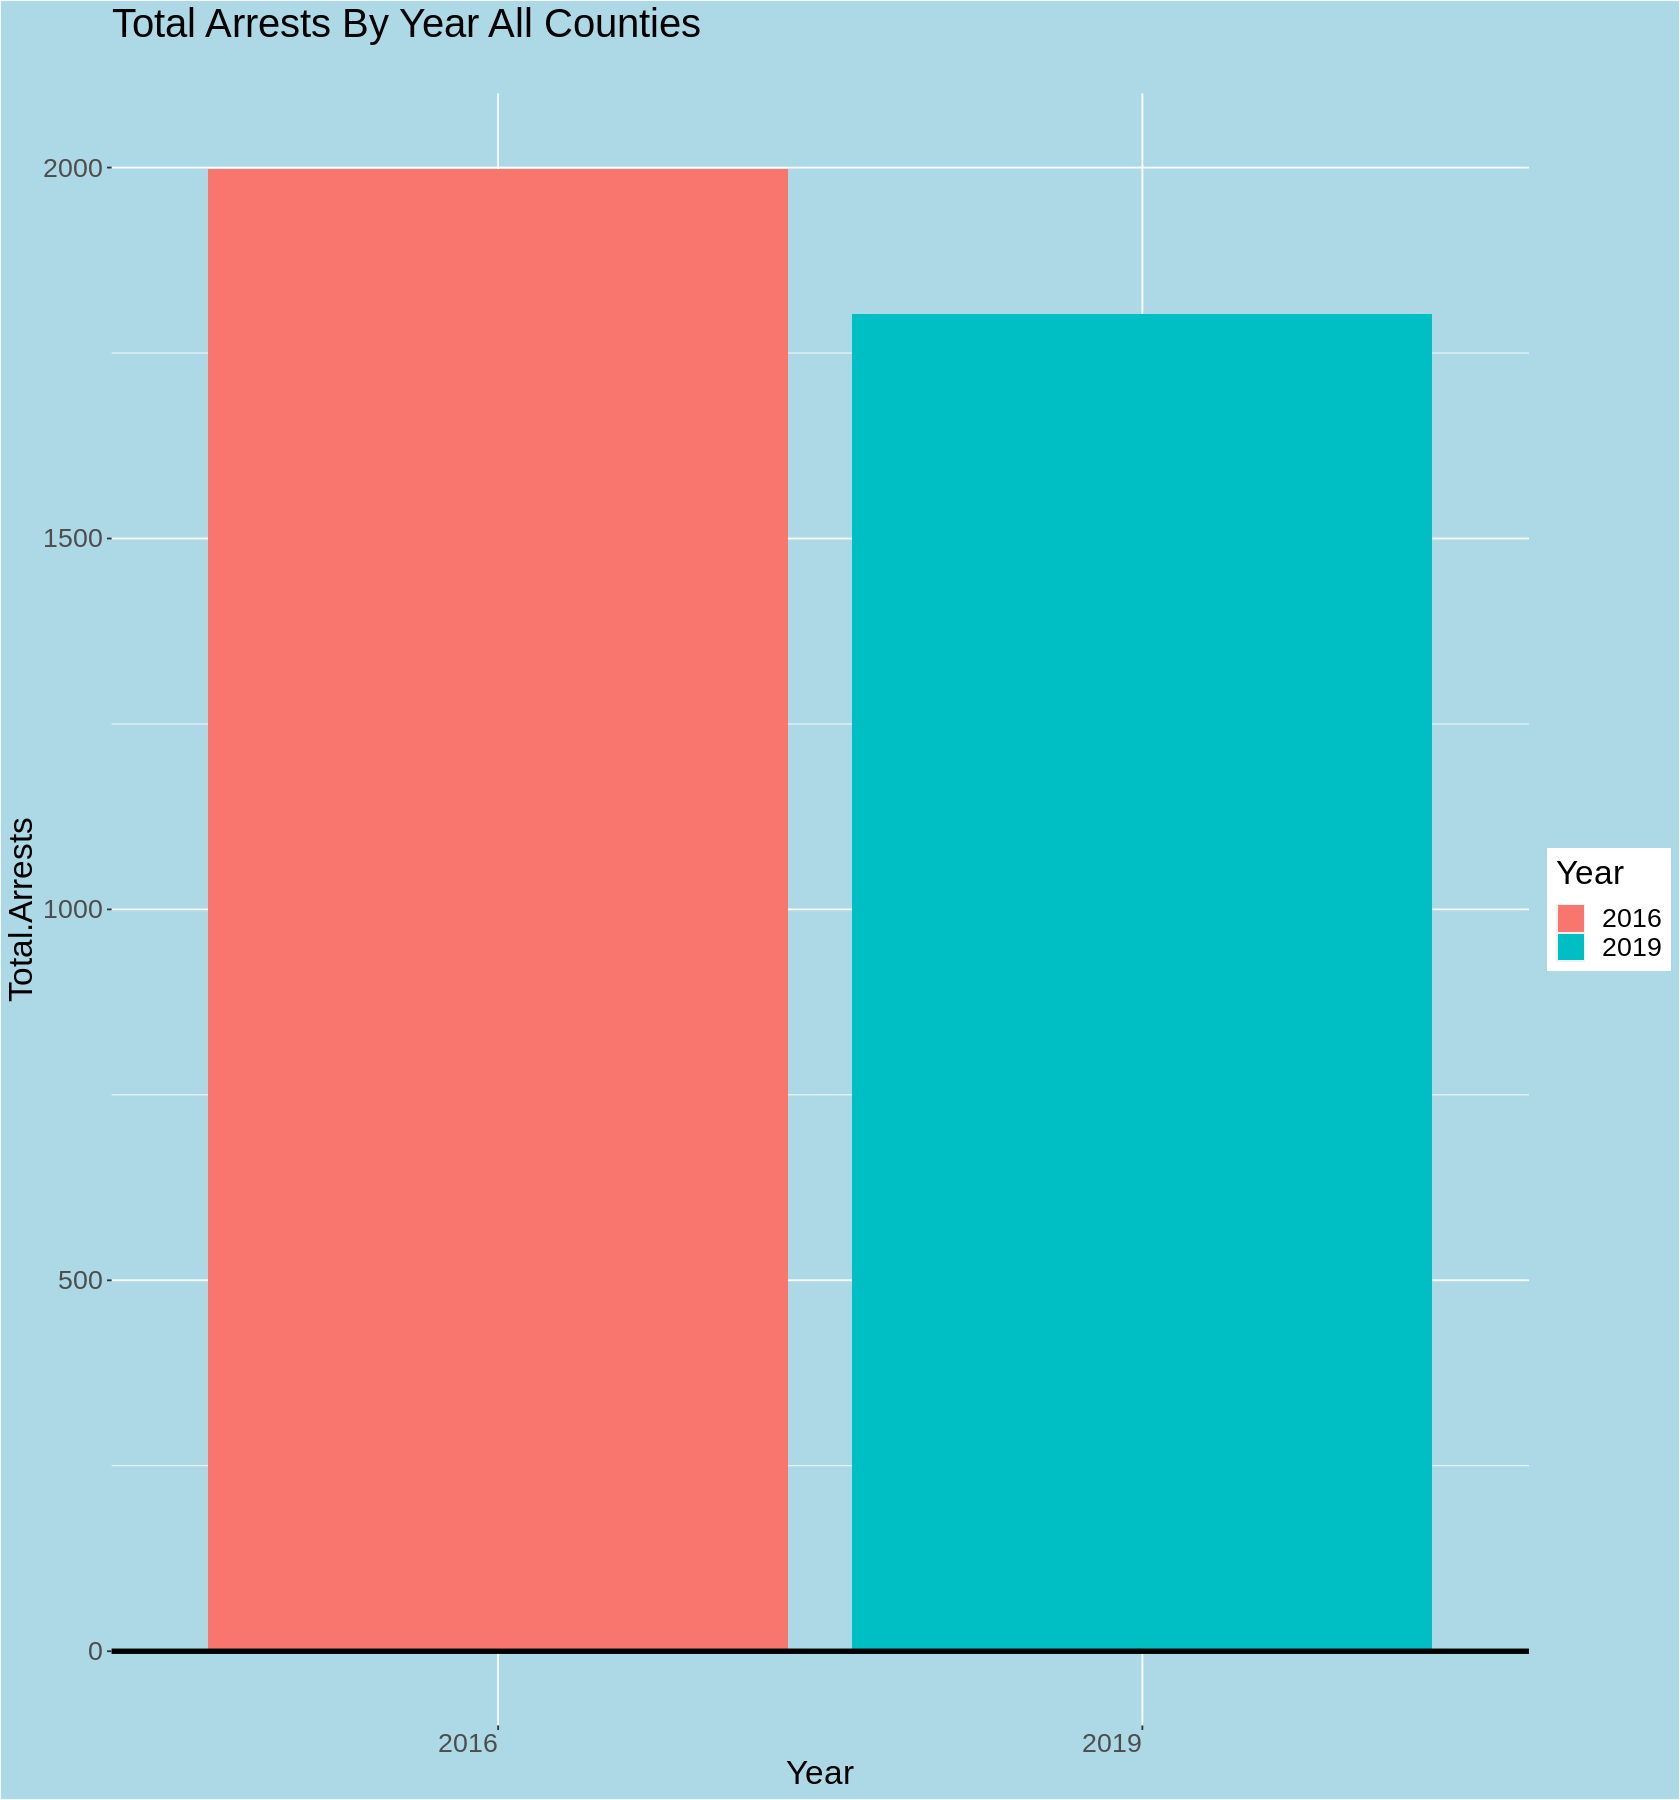

In [80]:
ggplot(CGR_gender_compiled, aes(x= Year , y = Total.Arrests , fill = Year)) +
        geom_bar(stat = "identity") +
        theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1))+
                                ylim(0 ,2000)+
        geom_hline(yintercept= 0, linetype="solid", 
                color = "black", size=1.5)+
                theme(text = element_text(size=20),
                                axis.text.x = element_text(angle=0, hjust=1)) +
                labs(title = "Total Arrests By Year All Counties",
                subtitle = "")+
                 theme(plot.background = element_rect(fill = "light blue"),
                      panel.background = element_rect(fill = "light blue"))

## Chart 2: Total Arrests By Gender

In [ ]:
# bar graph of men and women totala arrrests